<a href="https://colab.research.google.com/github/nevermind78/exemple/blob/master/03_02_Data_Wrangling_avec_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# Importation des bibliothèques
import pandas as pd
import numpy as np

# Concatener des dataframes

In [100]:
# dataframe 1
df1 =  pd.DataFrame({ 'StudentID': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],
                        'Score' : [89, 39, 50, 97, 22, 66, 31, 51, 71, 91, 56, 32, 52, 73, 92]})
# dataframe 2

df2 =  pd.DataFrame({'StudentID': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30],
                     'Score': [98, 93, 44, 77, 69, 56, 31, 53, 78, 93, 56, 77, 33, 56, 27]})

In [101]:
df1.head()

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22


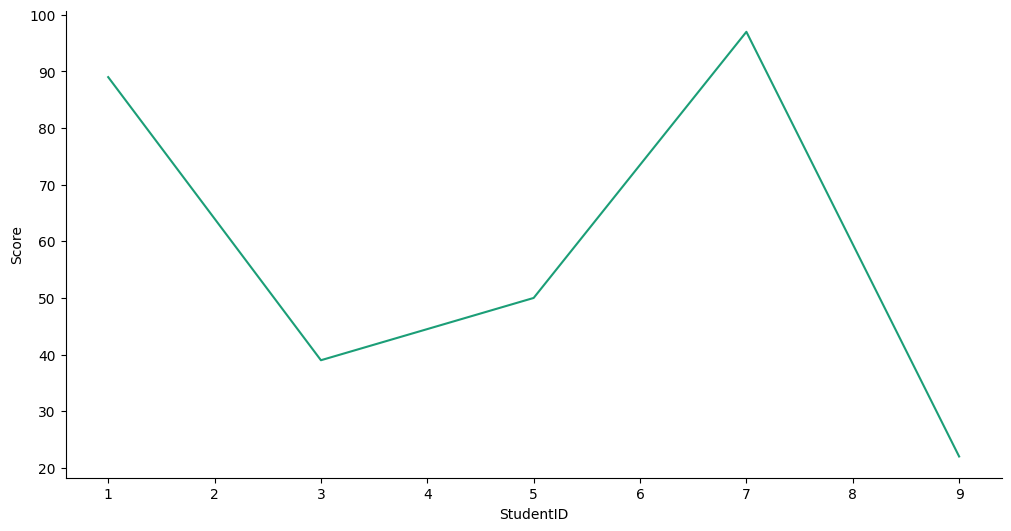

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['StudentID']
  ys = series['Score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('StudentID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('StudentID')
_ = plt.ylabel('Score')

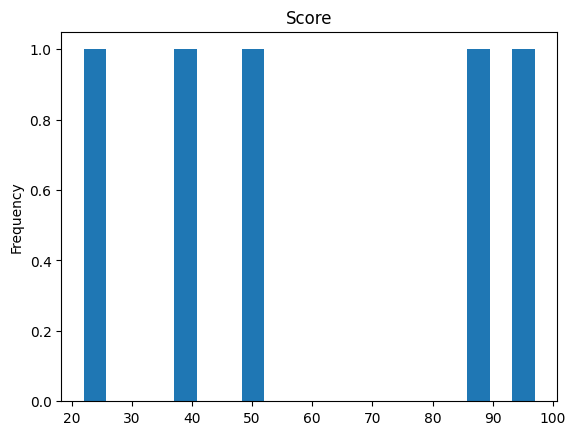

In [103]:
from matplotlib import pyplot as plt
_df_1['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   StudentID  15 non-null     int64
 1   Score      15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [105]:
# afficher les 5 premières lignes de df2
df2.head()

,StudentID,Score
0,2,98
1,4,93
2,6,44
3,8,77
4,10,69


In [106]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   StudentID  15 non-null     int64
 1   Score      15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [107]:
# pd.concat([df1,df2,...] ) --> concaténation
pd.concat([df1, df2], ignore_index=True) # recréer l'index du début jusqu à la fin

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22
5,11,66
6,13,31
7,15,51
8,17,71
9,19,91


In [108]:
pd.concat([df1, df2], ignore_index=False) # garder l'indes des dataframes

,StudentID,Score
0,1,89
1,3,39
2,5,50
3,7,97
4,9,22
5,11,66
6,13,31
7,15,51
8,17,71
9,19,91


# Merger des dataframes

In [109]:
dfm1 =  pd.DataFrame({ 'StudentID': [1, 2, 3],
                       'ScoreMath' : [22, 66, 31]})

dfm2 =  pd.DataFrame({ 'StudentID': [21, 8, 3],
                       'ScoreML' : [11, 85, 46]})

In [110]:
dfm1.merge(dfm2, how="inner")

,StudentID,ScoreMath,ScoreML
0,3,31,46


In [111]:
dfm1.merge(dfm2, how='outer')

,StudentID,ScoreMath,ScoreML
0,1,22.0,NaN
1,2,66.0,NaN
2,3,31.0,46.0
3,21,NaN,11.0
4,8,NaN,85.0


In [112]:
dfm1.merge(dfm2, how='right')

,StudentID,ScoreMath,ScoreML
0,21,NaN,11
1,8,NaN,85
2,3,31.0,46


In [113]:
dfm1.merge(dfm2, how='left')

,StudentID,ScoreMath,ScoreML
0,1,22,NaN
1,2,66,NaN
2,3,31,46.0


# Merging sur l'index

In [114]:
list(range(6))

[0, 1, 2, 3, 4, 5]

In [115]:
left1 = pd.DataFrame({'key': ['apple','ball','apple', 'apple',
'ball', 'cat'], 'value': range(6)})
left1

,key,value
0,apple,0
1,ball,1
2,apple,2
3,apple,3
4,ball,4
5,cat,5


In [116]:
right1 = pd.DataFrame({'group_val': [33.4, 5]}, index=['apple',
'ball'])
right1

,group_val
apple,33.4
ball,5.0


In [117]:
pd.merge(left1, right1, left_on='key', right_index=True)

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0


In [118]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

,key,value,group_val
0,apple,0,33.4
2,apple,2,33.4
3,apple,3,33.4
1,ball,1,5.0
4,ball,4,5.0
5,cat,5,NaN


# Reshaping and pivoting

In [119]:
data = np.arange(15).reshape((3,5))
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [120]:
indexers = ['Rainfall', 'Humidity', 'Wind']
indexers

['Rainfall', 'Humidity', 'Wind']

In [121]:
data = np.arange(15).reshape((3,5))
indexers = ['Rainfall', 'Humidity', 'Wind']
dframe1 = pd.DataFrame(data, index=indexers, columns=['Bergen', 'Oslo', 'Trondheim', 'Stavanger', 'Kristiansand'])
dframe1

,Bergen,Oslo,Trondheim,Stavanger,Kristiansand
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


In [122]:
stack = dframe1.stack()
stack

Rainfall  Bergen           0
          Oslo             1
          Trondheim        2
          Stavanger        3
          Kristiansand     4
Humidity  Bergen           5
          Oslo             6
          Trondheim        7
          Stavanger        8
          Kristiansand     9
Wind      Bergen          10
          Oslo            11
          Trondheim       12
          Stavanger       13
          Kristiansand    14
dtype: int64

In [123]:
stack.unstack()

,Bergen,Oslo,Trondheim,Stavanger,Kristiansand
Rainfall,0,1,2,3,4
Humidity,5,6,7,8,9
Wind,10,11,12,13,14


# Chercher et Supprimer les doublons

In [124]:
# '+' opérateur de conaténation
# '*  opératuer de duplication et ceci pour les listes , tuples et chaines de caractères
['Looping'] * 3 + ['Functions'] * 4  # créer une liste avec 'Looping' supliquées 3 fois et 'Functions' dupliquées 4 fois

['Looping',
 'Looping',
 'Looping',
 'Functions',
 'Functions',
 'Functions',
 'Functions']

In [125]:
frame3 = pd.DataFrame({'column 1': ['Looping'] * 3 + ['Functions']
* 4, 'column 2': [10, 10, 22, 23, 23, 24, 24]})
frame3
# frame3 contient des dupli dans column1

,column 1,column 2
0,Looping,10
1,Looping,10
2,Looping,22
3,Functions,23
4,Functions,23
5,Functions,24
6,Functions,24


In [126]:
frame3.duplicated() # indiques les lignes dupli avec True ou False

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [127]:
frame3.drop_duplicates() # drop <---> supprimer les duplications

,column 1,column 2
0,Looping,10
2,Looping,22
3,Functions,23
5,Functions,24


In [128]:
# manipulation de l'index : réiniatialisation aprés le supression des duplications
frame3.drop_duplicates().reset_index(drop=True)

,column 1,column 2
0,Looping,10
1,Looping,22
2,Functions,23
3,Functions,24


In [129]:
frame3['col3'] = range(7) # on va ajouter à frame 3 une colonne nommé 'col3' contenant [0,1,2,3,4,5,6]
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [130]:
# on a ajouté col3 pour garder une copie des anciens index avant la supression des duplications
frame3.drop_duplicates(['column 2']).reset_index(drop=True)

,column 1,column 2,col3
0,Looping,10,0
1,Looping,22,2
2,Functions,23,3
3,Functions,24,5


# Replacing des données

In [131]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [132]:
# Nan on l'obtien en écrivant np.nan
frame4 = frame3.replace(to_replace=23, value=np.nan)
frame4

,column 1,column 2,col3
0,Looping,10.0,0
1,Looping,10.0,1
2,Looping,22.0,2
3,Functions,NaN,3
4,Functions,NaN,4
5,Functions,24.0,5
6,Functions,24.0,6


In [133]:
frame4.replace(to_replace=np.nan, value=-1) # replace ne change pas le dataframe , change la vue seulement

,column 1,column 2,col3
0,Looping,10.0,0
1,Looping,10.0,1
2,Looping,22.0,2
3,Functions,-1.0,3
4,Functions,-1.0,4
5,Functions,24.0,5
6,Functions,24.0,6


In [134]:
frame4

,column 1,column 2,col3
0,Looping,10.0,0
1,Looping,10.0,1
2,Looping,22.0,2
3,Functions,NaN,3
4,Functions,NaN,4
5,Functions,24.0,5
6,Functions,24.0,6


In [135]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,3
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [136]:
frame3.replace(to_replace=[10, 23], value=[1, 2]) # remplacement multiple

,column 1,column 2,col3
0,Looping,1,0
1,Looping,1,1
2,Looping,22,2
3,Functions,2,3
4,Functions,2,4
5,Functions,24,5
6,Functions,24,6


In [137]:
frame3.iat[3, 2] = 12000 # iat = remplacer dans la position index =(i,j)  i = index de la ligne , j = index de la colonne

In [138]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,12000
4,Functions,23,4
5,Functions,24,5
6,Functions,24,6


In [139]:
frame3.at[5, "column 2"] = 12 # at := on définit la position par les noms des lignes et des colonnes ( comme loc et iloc)

In [140]:
frame3

,column 1,column 2,col3
0,Looping,10,0
1,Looping,10,1
2,Looping,22,2
3,Functions,23,12000
4,Functions,23,4
5,Functions,12,5
6,Functions,24,6


# Les valeurs manquantes

$$index \neq colonne $$

In [141]:
data = np.arange(15, 30).reshape(5, 3) # matrice 5 lignes , 3 col remplie par les nombres de 15 --> 29
dfx = pd.DataFrame(data, index=['apple', 'banana', 'kiwi', 'grapes', 'mango'], columns=['store1', 'store2', 'store3'])
dfx

,store1,store2,store3
apple,15,16,17
banana,18,19,20
kiwi,21,22,23
grapes,24,25,26
mango,27,28,29


In [142]:
dfx.columns

Index(['store1', 'store2', 'store3'], dtype='object')

In [143]:
dfx.index

Index(['apple', 'banana', 'kiwi', 'grapes', 'mango'], dtype='object')

In [144]:
# on va ajouter une colonne 'store4'
dfx['store4'] = np.nan # nan = n not , a number
dfx

,store1,store2,store3,store4
apple,15,16,17,NaN
banana,18,19,20,NaN
kiwi,21,22,23,NaN
grapes,24,25,26,NaN
mango,27,28,29,NaN


In [145]:
dfx.loc['apple']

store1    15.0
store2    16.0
store3    17.0
store4     NaN
Name: apple, dtype: float64

In [146]:
dfx.loc['orange'] = np.arange(15,19) # on va ajouter une ligne d'index ' orange' contenant [15,16,17,18]
dfx

,store1,store2,store3,store4
apple,15,16,17,NaN
banana,18,19,20,NaN
kiwi,21,22,23,NaN
grapes,24,25,26,NaN
mango,27,28,29,NaN
orange,15,16,17,18.0


In [147]:
dfx.loc["strawberry"] = np.nan
dfx

,store1,store2,store3,store4
apple,15.0,16.0,17.0,NaN
banana,18.0,19.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
orange,15.0,16.0,17.0,18.0
strawberry,NaN,NaN,NaN,NaN


In [148]:
dfx['store5'] = np.nan
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,19.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [149]:
dfx.loc["banana", "store2"] = -1
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [150]:
dfx.isnull().sum()

store1    1
store2    1
store3    1
store4    6
store5    7
dtype: int64

In [151]:
dfx.isnull().mean(axis=0) # moyenne des valeurs nulles par colonnes

store1    0.142857
store2    0.142857
store3    0.142857
store4    0.857143
store5    1.000000
dtype: float64

In [152]:
dfx.notnull()

,store1,store2,store3,store4,store5
apple,True,True,True,False,False
banana,True,True,True,False,False
kiwi,True,True,True,False,False
grapes,True,True,True,False,False
mango,True,True,True,False,False
orange,True,True,True,True,False
strawberry,False,False,False,False,False


In [153]:
dfx.notnull().mean()

store1    0.857143
store2    0.857143
store3    0.857143
store4    0.142857
store5    0.000000
dtype: float64

In [154]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [155]:
# Supression des valeurs nulles
dfx.dropna(how='all') # dropna --> supprimer les nan
# all --> supprimers des lignes entières contenant des nan

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN


In [156]:
dfx.dropna(how='all', axis=1) # supprimer les colonnes entières cotenant que des nan

,store1,store2,store3,store4
apple,15.0,16.0,17.0,NaN
banana,18.0,-1.0,20.0,NaN
kiwi,21.0,22.0,23.0,NaN
grapes,24.0,25.0,26.0,NaN
mango,27.0,28.0,29.0,NaN
orange,15.0,16.0,17.0,18.0
strawberry,NaN,NaN,NaN,NaN


In [157]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [158]:
dfx.dropna(thresh=2, axis=1) # threshold := seuil de supressions

,store1,store2,store3
apple,15.0,16.0,17.0
banana,18.0,-1.0,20.0
kiwi,21.0,22.0,23.0
grapes,24.0,25.0,26.0
mango,27.0,28.0,29.0
orange,15.0,16.0,17.0
strawberry,NaN,NaN,NaN


In [159]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [160]:
# remplacer les nan par des zéros
dfx.fillna(0) # la somme va être invariantes

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,0.0,0.0
banana,18.0,-1.0,20.0,0.0,0.0
kiwi,21.0,22.0,23.0,0.0,0.0
grapes,24.0,25.0,26.0,0.0,0.0
mango,27.0,28.0,29.0,0.0,0.0
orange,15.0,16.0,17.0,18.0,0.0
strawberry,0.0,0.0,0.0,0.0,0.0


In [161]:
dfx.mean()

store1    20.000000
store2    17.666667
store3    22.000000
store4    18.000000
store5          NaN
dtype: float64

In [162]:
dfx.fillna(0).mean() # la somme reste invariantes mais la moyennes est souvent modifiées

store1    17.142857
store2    15.142857
store3    18.857143
store4     2.571429
store5     0.000000
dtype: float64

In [163]:
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [164]:
# on va remplacer les nan par la moyenne du dataframe
dfx.mean()

store1    20.000000
store2    17.666667
store3    22.000000
store4    18.000000
store5          NaN
dtype: float64

In [165]:
dfx.fillna(dfx.mean())# chaque nan va être remplacée par la moyenne de sa colonne
# preserve les moyennes de chaque colonnes

,store1,store2,store3,store4,store5
apple,15.0,16.000000,17.0,18.0,NaN
banana,18.0,-1.000000,20.0,18.0,NaN
kiwi,21.0,22.000000,23.0,18.0,NaN
grapes,24.0,25.000000,26.0,18.0,NaN
mango,27.0,28.000000,29.0,18.0,NaN
orange,15.0,16.000000,17.0,18.0,NaN
strawberry,20.0,17.666667,22.0,18.0,NaN


In [166]:
# <--- backward , forward ---> filling
dfx

,store1,store2,store3,store4,store5
apple,15.0,16.0,17.0,NaN,NaN
banana,18.0,-1.0,20.0,NaN,NaN
kiwi,21.0,22.0,23.0,NaN,NaN
grapes,24.0,25.0,26.0,NaN,NaN
mango,27.0,28.0,29.0,NaN,NaN
orange,15.0,16.0,17.0,18.0,NaN
strawberry,NaN,NaN,NaN,NaN,NaN


In [167]:
dfx.store4.fillna(method='ffill') #forward --> substituer vers l'avant
# si la valeur précedente != nan on remplace la suivante si elle est nan  par la précedente

apple          NaN
banana         NaN
kiwi           NaN
grapes         NaN
mango          NaN
orange        18.0
strawberry    18.0
Name: store4, dtype: float64

In [168]:
dfx.store4.fillna(method='bfill') # <-----> substituer concernent les valeurs nan qui précédent
# si la valeur suivante != nan on remplace la précédente si elle est nan  par la suivante

apple         18.0
banana        18.0
kiwi          18.0
grapes        18.0
mango         18.0
orange        18.0
strawberry     NaN
Name: store4, dtype: float64

In [169]:
# meilleures méthodes ( des données numériques)

In [170]:
# interpoler les valeurs manquantes
n_ventes = pd.Series([100, np.nan, np.nan, 200, np.nan, 150]
)
n_ventes.interpolate()

0    100.000000
1    133.333333
2    166.666667
3    200.000000
4    175.000000
5    150.000000
dtype: float64

In [171]:
n_chaines = pd.Series(["A", np.nan, np.nan, "F", np.nan, "E"]
)
n_chaines.interpolate()

0      A
1    NaN
2    NaN
3      F
4    NaN
5      E
dtype: object

## Remapcler les NaN
*   suppripmer avec dropna()
    *   how ="all"
    *   des lignes entères
    *   des colonnes entières
*   remplacer
    * remplacer par 0
    * remplacer par la moyenne de chaque colonne
    * ffill rempalcement par le suivant
    * bfill remplaceement par le précédent
* Interpolation
  * ça fonctionne que pour les colonnes contenant des valeurs numérqiues
  
  

# Transformer les variables numériques en catégories

In [172]:
notes = np.random.randint(20, size=(15,))

In [173]:
notes

array([10, 18, 12,  1,  0, 15,  3, 10, 13, 18, 15, 12, 14,  4, 19])

In [174]:
# bins pour les mentions
bins = [-1,10, 12, 15, 18, 20] # --> [-1,10[ U [10,12[ U [12,15[ U [15,18[ U [18,20]

In [175]:
# les noms des mentions
bins_names = ['echoué', 'passable', 'assez-bien', 'bien', 'très bien'] # des catégories

In [176]:
# aatribuerpour chaque note sa mention
category = pd.cut(notes, bins, right=False, labels=bins_names)
# cut couper les notes en catégories en suivant les intervalles indiqués par bins
# right = False --> des intervalles ouverts à droites
# labes = les noms des catégories

In [177]:
category

['passable', 'très bien', 'assez-bien', 'echoué', 'echoué', ..., 'bien', 'assez-bien', 'assez-bien', 'echoué', 'très bien']
Length: 15
Categories (5, object): ['echoué' < 'passable' < 'assez-bien' < 'bien' < 'très bien']

In [178]:
id= range(15) # id des étudiants
df_notes = pd.DataFrame(notes , index=id, columns =["notes"]) # dataframe qui contient les notes et id comme index
df_notes["mentions"] = category # ajouter la colonne pour les mentions affecté pour chaque note

In [179]:
df_notes

,notes,mentions
0,10,passable
1,18,très bien
2,12,assez-bien
3,1,echoué
4,0,echoué
5,15,bien
6,3,echoué
7,10,passable
8,13,assez-bien
9,18,très bien


In [180]:
#on peut utilser apply
def mention(n):
    if n < 10:
        return 'echoué'
    elif n < 12:
        return 'passable'
    elif n < 15:
        return 'assez-bien'
    elif n < 18:
        return 'bien'
    else:
        return 'très bien'

In [181]:
id= range(15) # id des étudiants
df_notes2 = pd.DataFrame(notes , index=id, columns =["notes"])
df_notes2

,notes
0,10
1,18
2,12
3,1
4,0
5,15
6,3
7,10
8,13
9,18


In [182]:
df_notes2["mention"] = df_notes2["notes"].apply(mention)
# apply applique la fonction mention sur la colonne df_notes2["notes"]
# et affecte le résultat dans la colonnes df_notes2["mention"]
df_notes2

,notes,mention
0,10,passable
1,18,très bien
2,12,assez-bien
3,1,echoué
4,0,echoué
5,15,bien
6,3,echoué
7,10,passable
8,13,assez-bien
9,18,très bien


In [183]:
# on va ajouter une colonne pour le rang
# rank
df_notes2["Rang"] = df_notes2["notes"].rank(ascending = False , method ='min').astype(int)

In [184]:
df_notes2

,notes,mention,Rang
0,10,passable,10
1,18,très bien,2
2,12,assez-bien,8
3,1,echoué,14
4,0,echoué,15
5,15,bien,4
6,3,echoué,13
7,10,passable,10
8,13,assez-bien,7
9,18,très bien,2


# Aggregations avec groupby

In [186]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [188]:
data = '/gdrive/MyDrive/Data_FDA/data/'

In [189]:
auto = pd.read_csv(data + 'Automobile_data.csv')

In [190]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [191]:
auto.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [192]:
auto['body-style'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [193]:
auto.groupby('body-style')

In [194]:
auto.groupby('body-style').groups

{'convertible': [0, 1, 72, 128, 172, 189], 'hardtop': [69, 74, 98, 126, 127, 167, 168, 170], 'hatchback': [2, 9, 18, 19, 21, 22, 23, 24, 29, 30, 31, 32, 33, 34, 37, 38, 46, 50, 51, 52, 55, 56, 57, 58, 59, 61, 64, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 95, 99, 104, 105, 106, 118, 119, 120, 124, 125, 129, 131, 132, 134, 136, 138, 139, 140, 150, 151, 152, 157, 159, 161, 164, 166, 169, 171, 175, 177, 178, 179, 190], 'sedan': [3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 20, 25, 26, 27, 35, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 53, 54, 60, 62, 63, 65, 66, 67, 70, 71, 73, 85, 86, 87, 88, 89, 90, 91, 92, 94, 96, 100, 101, 103, 107, 108, 111, 112, 115, 116, 117, 121, 122, 133, 135, 137, 141, 142, 143, 144, 145, 156, 158, 160, 162, 163, 165, 173, 174, 176, 180, 182, 183, 184, 185, 186, 187, 188, 191, 192, 194, 196, 198, 200, 201, 202, 203, 204], 'wagon': [7, 28, 36, 68, 93, 97, 102, 109, 110, 113, 114, 123, 130, 146, 147, 148, 149, 153, 154, 155, 181, 193, 195, 197, 199]}

In [195]:
auto.groupby('body-style').groups.keys()

dict_keys(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'])

In [199]:
style = auto.groupby('body-style')
style.get_group('convertible')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,3,142,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,35056
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028
172,2,134,toyota,gas,std,two,convertible,rwd,front,98.4,...,146,mpfi,3.62,3.5,9.3,116,4800,24,30,17669
189,3,?,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595


In [200]:
auto['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [201]:
double_groupin = auto.groupby(["body-style", 'drive-wheels'])

In [203]:
double_groupin.first() # les premiers éléments

symboling normalized-losses           make  \
body-style  drive-wheels                                               
convertible fwd                   3                 ?     volkswagen   
            rwd                   3                 ?    alfa-romero   
hardtop     fwd                   2               168         nissan   
            rwd                   0                93  mercedes-benz   
hatchback   4wd                   0                 ?           audi   
            fwd                   2               121      chevrolet   
            rwd                   1                 ?    alfa-romero   
sedan       4wd                   2               164           audi   
            fwd                   2               164           audi   
            rwd                   2               192            bmw   
wagon       4wd                   0                85         subaru   
            fwd                   1                 ?           audi   
            rwd                  -1                93  mercedes-benz   

                         fuel-type aspiration num-of-doors engine-location  \
body-style  drive-wheels                                                     
convertible fwd                gas        std          two           front   
            rwd                gas        std          two           front   
hardtop     fwd                gas        std          two           front   
            rwd             diesel      turbo          two           front   
hatchback   4wd                gas      turbo          two           front   
            fwd                gas        std          two           front   
            rwd                gas        std          two           front   
sedan       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd                gas        std          two           front   
wagon       4wd                gas        std         four           front   
            fwd                gas        std         four           front   
            rwd             diesel      turbo         four           front   

                          wheel-base  length  width  ...  engine-size  \
body-style  drive-wheels                             ...                
convertible fwd                 94.5   159.3   64.2  ...          109   
            rwd                 88.6   168.8   64.1  ...          130   
hardtop     fwd                 95.1   162.4   63.8  ...           97   
            rwd                106.7   187.5   70.3  ...          183   
hatchback   4wd                 99.5   178.2   67.9  ...          131   
            fwd                 88.4   141.1   60.3  ...           61   
            rwd                 94.5   171.2   65.5  ...          152   
sedan       4wd                 99.4   176.6   66.4  ...          136   
            fwd                 99.8   176.6   66.2  ...          109   
            rwd                101.2   176.8   64.8  ...          108   
wagon       4wd                 96.9   173.6   65.4  ...          108   
            fwd                105.8   192.7   71.4  ...          136   
            rwd                110.0   190.9   70.3  ...          183   

                          fuel-system  bore stroke  compression-ratio  \
body-style  drive-wheels                                                
convertible fwd                  mpfi  3.19    3.4                8.5   
            rwd                  mpfi  3.47   2.68                9.0   
hardtop     fwd                  2bbl  3.15   3.29                9.4   
            rwd                   idi  3.58   3.64               21.5   
hatchback   4wd                  mpfi  3.13    3.4                7.0   
            fwd                  2bbl  2.91   3.03                9.5   
            rwd                  mpfi  2.68   3.47                9.0   
sedan       4wd      

In [204]:
style.first()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
body-style,,,,,,,,,,,,,,,,,,,,,
convertible,3,?,alfa-romero,gas,std,two,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
hardtop,0,93,mercedes-benz,diesel,turbo,two,rwd,front,106.7,187.5,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
hatchback,1,?,alfa-romero,gas,std,two,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
sedan,2,164,audi,gas,std,four,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
wagon,1,?,audi,gas,std,four,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920


In [205]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [206]:
style['city-mpg'].mean()

body-style
convertible    20.500000
hardtop        21.625000
hatchback      26.314286
sedan          25.322917
wagon          24.040000
Name: city-mpg, dtype: float64

<Axes: xlabel='body-style'>

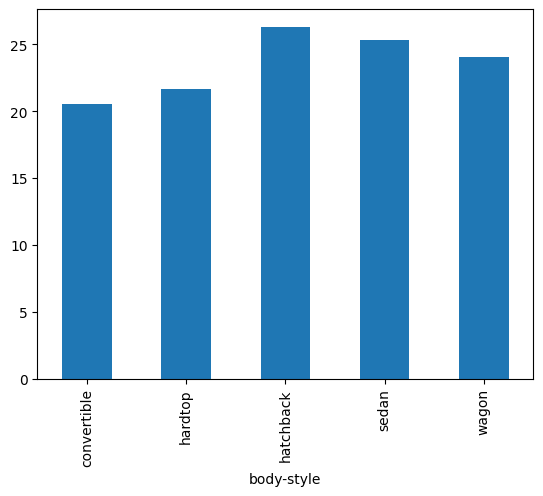

In [207]:
style['city-mpg'].mean().plot(kind='bar') # histogramme  kid = type bar

<Axes: xlabel='body-style'>

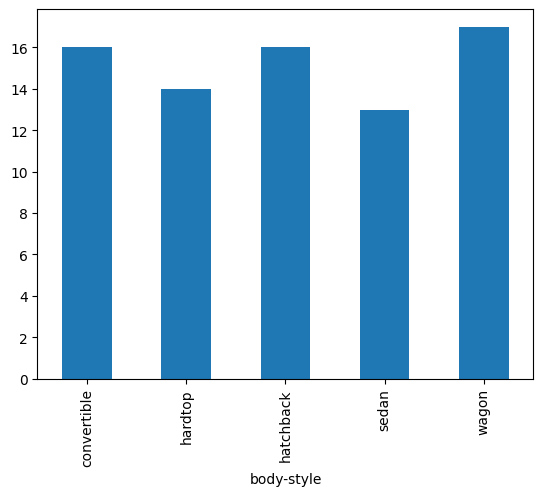

In [208]:
style['city-mpg'].min().plot(kind='bar')

In [209]:
style.get_group('convertible').mean()

<ipython-input-209-17ba529ee0ac>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  style.get_group('convertible').mean()


symboling            2.833333e+00
wheel-base           9.270000e+01
length               1.703833e+02
width                6.558333e+01
height               5.143333e+01
curb-weight          2.801667e+03
engine-size          1.571667e+02
compression-ratio    8.933333e+00
horsepower           1.851853e+15
peak-rpm             8.334167e+22
city-mpg             2.050000e+01
highway-mpg          2.600000e+01
price                2.249194e+28
dtype: float64

In [210]:
style.agg(['mean', 'max']) #double agrégation : moyenne est le maximum pour chaque attribut dans le groupe des styles

<ipython-input-210-c6abc1d0f14a>:1: FutureWarning: ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  style.agg(['mean', 'max'])


symboling      wheel-base             length             width  \
                 mean max        mean    max        mean    max       mean   
body-style                                                                   
convertible  2.833333   3   92.700000   98.4  170.383333  180.3  65.583333   
hardtop      1.875000   3   98.500000  112.0  176.937500  199.2  66.612500   
hatchback    1.585714   3   95.535714  102.9  166.592857  186.6  65.247143   
sedan        0.333333   2  100.619792  120.9  177.585417  208.1  66.260417   
wagon       -0.160000   1  102.156000  114.2  181.304000  198.9  66.256000   

                      height        curb-weight       engine-size       \
              max       mean   max         mean   max        mean  max   
body-style                                                               
convertible  70.5  51.433333  55.6  2801.666667  3685  157.166667  234   
hardtop      72.0  52.850000  55.4  2810.625000  3715  176.250000  304   
hatchback    72.3  52.108571  56.1  2348.185714  3366  114.400000  203   
sedan        71.7  54.337500  56.7  2610.593750  4066  130.822917  326   
wagon        71.4  56.728000  59.8  2784.240000  3750  123.840000  183   

            compression-ratio         city-mpg     highway-mpg      
                         mean   max       mean max        mean max  
body-style                                                          
convertible          8.933333   9.5  20.500000  24   26.000000  30  
hardtop             10.725000  21.5  21.625000  31   27.250000  37  
hatchback            9.027429  22.5  26.314286  49   32.171429  54  
sedan               10.937500  23.0  25.322917  45   30.833333  50  
wagon               10.316000  21.5  24.040000  31   28.720000  37